




Подгружаем свой id, ключ доступа и все нужные нам пакеты. Пишем функцию для выкачивания инфомрации из контактика.

In [1]:
token= "36ac5b169f734e1ff4c89d78916a185a6facc3e2050de716197127d4a17b7925a77069367c342b437ae93"
myid = "6045249"

# Подгружаем уже знакомую нам библиотеку для запросов
import requests

def Vk_downloader(method,parameters,token = token):
    url = 'https://api.vk.com/method/'+method+'?'+parameters+'&access_token='+str(token)
    response = requests.get(url) 
    return(response.json())

In [2]:
# Проверяем всё ли работает на своём имени.
Vk_downloader('users.get','user_ids='+myid)

{'response': [{'first_name': 'Филипп',
   'last_name': 'Ульянкин',
   'uid': 6045249}]}

In [3]:
# Интересующие нас группы 
ikanam = 'https://vk.com/ikanam'
ef16   = 'https://vk.com/ikanamchik'
ef15   = 'https://vk.com/efka2015'
ef14   = 'https://vk.com/ekfa14'
ef13   = 'https://vk.com/club102346076'
ef12   = 'https://vk.com/economy.rane'

In [4]:
# Достаём участиков каждой из групп
groups_id = ['ikanam','ikanamchik','efka2015','ekfa14','102346076','economy.rane']

users = [Vk_downloader('groups.getMembers','group_id='+ids)['response']['users'] \
                                                                for ids in groups_id]

In [5]:
# Объединим все id  в один длинный список и оставим только уникальные элементы
users1 = [ ]
for item in users:
    users1.extend(item)
    
# Было юзеров до ужимания
print(len(users1))

# Стало юзеров после ужимания
user_set = set(users1)
print(len(user_set))

# Сделаем итоговый вектор из id, чтобы было поудобнее их вызывать
users = list(user_set)

750
407


##  Анализ информации о людях с иканама...

In [6]:
import time

we_want = 'sex,bdate,city,country,home_town,counters,photo_400_orig'
infa = [ ]
for user in users:
    time.sleep(0.4)
    a = Vk_downloader('users.get','user_ids='+str(user)+'&fields='+we_want)['response'][0]
    infa.append(a)
    

ConnectionError: HTTPSConnectionPool(host='api.vk.com', port=443): Max retries exceeded with url: /method/users.get?user_ids=13982909&fields=sex,bdate,city,country,home_town,counters,photo_400_orig&access_token=36ac5b169f734e1ff4c89d78916a185a6facc3e2050de716197127d4a17b7925a77069367c342b437ae93 (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x7fb72192c208>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))

In [69]:
Vk_downloader('users.get','user_ids='+str(users[0])+'&fields='+we_want)['response'][0]

{'bdate': '27.9.1997',
 'city': 1,
 'counters': {'albums': 1,
  'audios': 1573,
  'followers': 125,
  'friends': 137,
  'gifts': 66,
  'mutual_friends': 32,
  'notes': 1,
  'online_friends': 33,
  'pages': 94,
  'photos': 86,
  'subscriptions': 0,
  'user_photos': 96,
  'videos': 308},
 'country': 1,
 'first_name': 'Ксения',
 'home_town': 'Кострома',
 'last_name': 'Кулак',
 'photo_400_orig': 'https://pp.userapi.com/c629508/v629508760/3e43b/QT0oAYHNsro.jpg',
 'sex': 1,
 'uid': 22261760}

In [76]:
# Пилим табличку, переделываем в рамках неё переменную со счётчиками!
import pandas as pd
df1 = pd.DataFrame(infa)
df1.head()

,bdate,city,counters,country,deactivated,first_name,home_town,last_name,photo_400_orig,sex,uid
0,27.9.1997,1.0,"{'followers': 125, 'friends': 137, 'gifts': 66...",1.0,NaN,Ксения,Кострома,Кулак,https://pp.userapi.com/c629508/v629508760/3e43...,1,22261760
1,24.3,1.0,"{'albums': 12, 'friends': 276, 'groups': 185, ...",1.0,NaN,Светлана,Белгород,Скибенко,https://pp.userapi.com/c837325/v837325267/3192...,1,137312267
2,NaN,1.0,"{'albums': 5, 'friends': 201, 'groups': 50, 'f...",1.0,NaN,Иоанн,Москва,Конов,https://pp.userapi.com/c636927/v636927029/330c...,2,4182029
3,2.7,1.0,"{'followers': 66, 'friends': 118, 'gifts': 28,...",1.0,NaN,Анна,,Селищева,https://pp.userapi.com/c836337/v836337310/23f8...,1,161292310
4,NaN,0.0,"{'mutual_friends': 23, 'pages': 8, 'online_fri...",1.0,NaN,Ксюша,NaN,Касьянова,https://pp.userapi.com/c631729/v631729759/1820...,1,37662759


In [112]:
import numpy as np

In [156]:
aa = [ ]
for item in df1['counters']:
    try:
        np.isnan(item)
        aa.append({ })
    except Exception:
        aa.append(item)

df2 = pd.DataFrame(aa)

In [160]:
data = pd.concat([df1, df2], axis=1, join_axes=[df1.index])
data.drop('counters',axis=1,inplace=True)  

print(df1.shape)
print(df2.shape)
print(data.shape)

(407, 11)
(407, 14)
(407, 24)


In [161]:
data.head()

,bdate,city,country,deactivated,first_name,home_town,last_name,photo_400_orig,sex,uid,...,gifts,groups,mutual_friends,notes,online_friends,pages,photos,subscriptions,user_photos,videos
0,27.9.1997,1.0,1.0,NaN,Ксения,Кострома,Кулак,https://pp.userapi.com/c629508/v629508760/3e43...,1,22261760,...,66.0,NaN,32.0,1.0,34.0,94.0,86.0,0.0,96.0,308.0
1,24.3,1.0,1.0,NaN,Светлана,Белгород,Скибенко,https://pp.userapi.com/c837325/v837325267/3192...,1,137312267,...,60.0,185.0,21.0,0.0,66.0,134.0,201.0,0.0,3.0,113.0
2,NaN,1.0,1.0,NaN,Иоанн,Москва,Конов,https://pp.userapi.com/c636927/v636927029/330c...,2,4182029,...,3.0,50.0,13.0,26.0,29.0,19.0,803.0,0.0,370.0,94.0
3,2.7,1.0,1.0,NaN,Анна,,Селищева,https://pp.userapi.com/c836337/v836337310/23f8...,1,161292310,...,28.0,NaN,24.0,0.0,38.0,74.0,45.0,0.0,0.0,70.0
4,NaN,0.0,1.0,NaN,Ксюша,NaN,Касьянова,https://pp.userapi.com/c631729/v631729759/1820...,1,37662759,...,NaN,NaN,23.0,0.0,29.0,8.0,1.0,0.0,NaN,65.0


In [ ]:
# Какой-нибудь анализ этой таблички (я хз какой, лал)

## Граф эконома

In [184]:
econom_id = list(data['uid'])
econom_set = set(econom_id)

Напишем функцию, которая будет доставать друзей каждого человека и оставлять только друзей экономчан.

In [195]:
def econom_friends(econ):
    friends = set(Vk_downloader('friends.get','user_id='+str(econ))['response'])
    return(list(friends.intersection(econom_set)))
    
k = 0
eco = { }

for people in econom_id:
    time.sleep(0.4) # Нельзя делать больше трёх запросов в минуту
    try:
        eco[people] = econom_friends(people)
    # Если юзер выпилил себя из контакта, то код выше выдаст ошибку
    except Exception:
        eco[people] = [ ]
        k = k + 1 # Посчитаем таких людей

In [197]:
k  # Люди, удалившие свои странички

13

In [199]:
import networkx as nx           # Пакет для работы с графами
import matplotlib.pyplot as plt # Пакет для визуализации

# Опция для отображения картинок
%matplotlib inline 
# Размер картинок
plt.figure(figsize=(20,10))

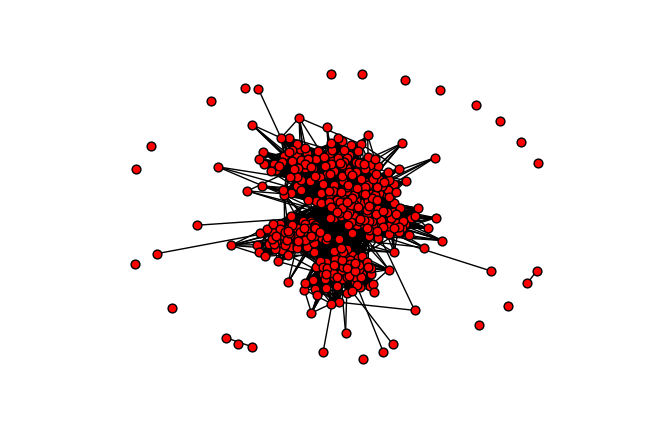

In [201]:
G = nx.from_dict_of_lists(eco)
nx.draw(G,node_size=40, cmap=True)

In [203]:
nx.is_connected(G)

False

In [204]:
sg = nx.connected_component_subgraphs(G)
[len(s) for s in sg]

[385, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [206]:
sg = list(nx.connected_component_subgraphs(G))

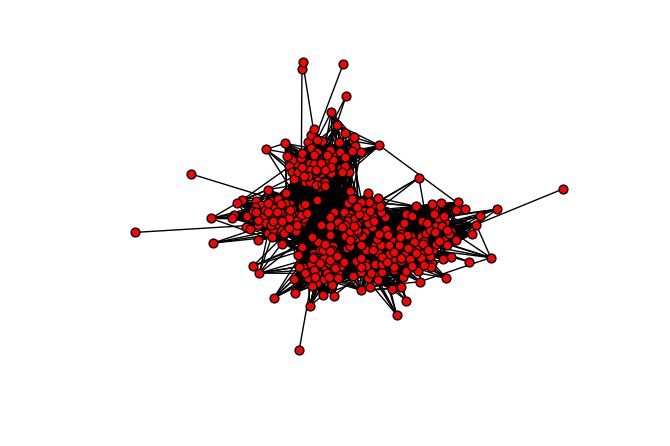

In [209]:
MG = sg[0]
nx.draw(MG,node_size=40, cmap=True)

In [210]:
nx.diameter(MG)

5

In [219]:
print('Центр графа:', nx.center(MG))
# Это что за прикол?!

Центр графа: [30419994, 20038528, 30469307, 154585217, 22096015, 49853608, 33447090, 176568505, 22163769, 246396227, 6045249, 32218565, 141126101, 6784768, 386799133, 750115, 7560796, 116576875, 18236049, 112561839, 8780561, 116977285, 150423338, 9050946, 53504993, 18805608, 28043134, 26582935, 145608859, 22333387]


In [221]:
center = nx.center(MG)

In [214]:
print('Коэффициент кластеризации', nx.average_clustering(MG))

Коэффициент кластеризации 0.559805990992195


In [217]:
lg = sg[1]

In [218]:
lg.edge

{418461892: {}}

In [349]:
import igraph as ig

In [348]:
G= {'v1': ['v2', 'v3'], 'v2': ['v1'], 'v3': ['v1', 'v4'], 'v4': ['v3']}
mvi= {'v1': 1, 'v2': 2, 'v3': 3, 'v4': 4}
g= ig.Graph(edges= [(mvi[v], mvi[a]) for v in G.keys() for a in G[v]])

Создадим свой первый граф! Он будет иметь одну вершину и называться $g$.

Проблемы с визуализацией в 3 питоне:

https://github.com/igraph/python-igraph/issues/89

https://github.com/igraph/python-igraph/issues/88

In [350]:
g = ig.Graph(1)
g

In [262]:
g.add_vertices(2)
print(g)

IGRAPH U--- 3 0 --


In [263]:
g.add_edges([(0,1), (1,2)])

In [264]:
print(g)

IGRAPH U--- 3 2 --
+ edges:
0--1 1--2


In [269]:
g.add_edges([(2,0)])

In [270]:
g.add_vertices(3)

In [271]:
g.add_edges([(2,3),(3,4),(4,5),(5,3)])

In [272]:
print(g)

IGRAPH U--- 6 8 --
+ edges:
0--1 1--2 0--2 0--2 2--3 3--4 4--5 3--5


In [276]:
g.get_adjlist()

[[1, 2, 2], [0, 2], [0, 0, 1, 3], [2, 4, 5], [3, 5], [3, 4]]

In [285]:
g = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])


In [287]:
g.vs

In [301]:
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]


In [302]:
ig.summary(g)

IGRAPH UN-- 7 9 -- 
+ attr: age (v), gender (v), name (v), is_formal (e)


In [303]:
g.es[0]

igraph.Edge(<igraph.Graph object at 0x7fcbc1b12a98>, 0, {'is_formal': False})

In [306]:
g.vs[0]

igraph.Vertex(<igraph.Graph object at 0x7fcbc1b12a98>, 0, {'gender': 'f', 'name': 'Alice', 'age': 25})

In [309]:
g["date"] = "2009-01-10"

In [310]:
g.vs[3]["foo"] = "bar"

In [311]:
g.vs["foo"]

[None, None, None, 'bar', None, None, None]

In [312]:
del g.vs["foo"]

In [313]:
g.vs["foo"]

KeyError: 'Attribute does not exist'

In [314]:
g.degree() # vertex degree

[3, 1, 4, 3, 2, 3, 2]

In [315]:
layout = g.layout("kk")

In [319]:
ig.plot(g,layout = layout)

AttributeError: 'bytes' object has no attribute 'encode'

In [320]:
gg = ig.Graph(1)
ig.plot(gg,layout = layout)

AttributeError: 'bytes' object has no attribute 'encode'

In [346]:
g = ig.Graph(n = 12, directed=True)
g.add_edges([(1,0),(2,1), (3,2), (4,3),
             (5,1),
             (6,2), (7,6), (8,7),
             (9,0),
             (10,0), (11,10)])
g.vs["label"] = ["A", "B", "A", "B", "C", "F", "C", "B", "D", "C", "D", "F"]
ig.plot(g, layout="kk")

AttributeError: 'bytes' object has no attribute 'encode'